# Validation of the tsib.buildingconfig
Author: Leander Kotzur

Date: 21.09.2019

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import tsib.buildingconfig as cfg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import os

### Read building configurations data

Building configurations for 5 archetypes

In [5]:
bdgs_raw = pd.read_csv(os.path.join('5_archetypes_config.csv'), index_col = 0)

In [6]:
bdgs_raw

,buildingYear,a_ref_app,surrounding,n_persons,roofOrientation,ownership,existingHeatSupply,longitude,latitude,n_apartments,hotWaterElec,comfortT_lb,comfortT_ub,nightReduction,capControl
0,1919,79.0,Terraced,1,90.0,False,Oil boiler,9.779301,50.922095,11,False,21.0,25.0,True,True
1,1979,39.0,Terraced,4,67.5,True,Oil boiler,9.479936,50.410871,3,False,21.0,25.0,True,True
2,1959,59.0,Detached,2,0.0,True,Gas boiler,9.572005,50.869338,1,False,21.0,25.0,True,True
3,1949,59.0,Semi,2,22.5,False,Electric heater,10.851559,51.295468,37,False,21.0,25.0,True,True
4,1969,99.0,Semi,3,45.0,False,District heating,9.763013,50.986896,423,False,21.0,25.0,True,True


In [7]:
bdgs_dict = bdgs_raw.T.to_dict()

### Loop over the buildings, define them and get their profile

In [21]:
bdg_cfgs = {}
bdg_cfgs_print = {}

In [73]:
for bdg_ix in bdgs_dict:
    bdg_cfgs[bdg_ix] = cfg.BuildingConfiguration(bdgs_dict[bdg_ix])
    bdg_cfgs_print[bdg_ix] = bdg_cfgs[bdg_ix].getBdgCfg()

In [92]:
bdg_cfgs_print[0]

{'n_apartments': 11,
 'A_ref': 869.0,
 'n_Storey': 5,
 'h_room': 2.5,
 'A_Window_North': 2.3542669653837223,
 'A_Window_East': 67.35250709662996,
 'A_Window_South': 2.3542669653837223,
 'A_Window_West': 67.35250709662996,
 'A_Window_Horizontal': 0.0,
 'A_Window': 139.4135481240274,
 'F_sh_vert': 0.6,
 'F_sh_hor': 0.8,
 'F_f': 0.3,
 'F_w': 0.9,
 'A_Wall_1': 312.6057092296473,
 'A_Wall_2': 0.0,
 'A_Wall_3': 0.0,
 'A_Roof_1': 234.013474801061,
 'A_Roof_2': 0.0,
 'A_Floor_1': 165.26318302387267,
 'A_Floor_2': 0.0,
 'A_Door_1': 2.047188665551063,
 'roofTilt': 45.0,
 'roofOrientation': 90.0,
 'buildingYear': 1919,
 'U_Window': 1.5312715505244898,
 'g_gl_n_Window': 0.38281788763112246,
 'U_Wall_1': 1.7,
 'b_Transmission_Wall_1': 1,
 'U_Wall_2': 1.7,
 'b_Transmission_Wall_2': 0.0,
 'U_Wall_3': 1.7,
 'b_Transmission_Wall_3': 0.0,
 'U_Roof_1': 1.4,
 'b_Transmission_Roof_1': 1,
 'U_Roof_2': 0.64516129,
 'b_Transmission_Roof_2': 1,
 'U_Door_1': 3.0,
 'U_Floor_1': 0.7692307690000001,
 'b_Transmissi

In [60]:
import tsib.thermal.buildingmodel as bdg

In [78]:
bdgs = {}

In [83]:
for bdg_ix in bdgs_dict:
    bdgs[bdg_ix] = bdg.Building(configurator = bdg_cfgs[bdg_ix])
    bdgs[bdg_ix].getLoad()

### Plot example results and export to CSV

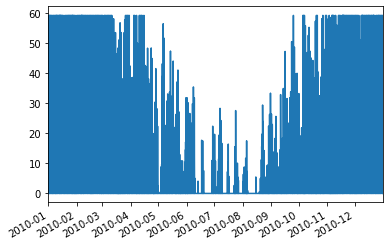

In [87]:
bdgs[0].detailedResults['Heating Load'].plot()

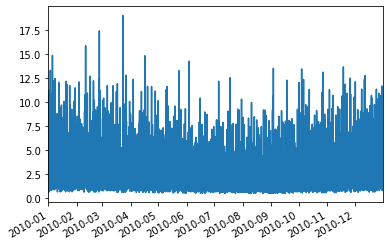

In [86]:
bdgs[0].detailedResults['Electricity Load'].plot()

In [91]:
bdgs[0].toCSV(filename="example_result")